## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


In [4]:
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2

In [5]:
X = np.concatenate((x1, x2), axis=1)

In [6]:
theta = np.pi / 4
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

In [7]:
X_rotated = X @ R

In [8]:
cov = np.cov(X_rotated, rowvar=False)

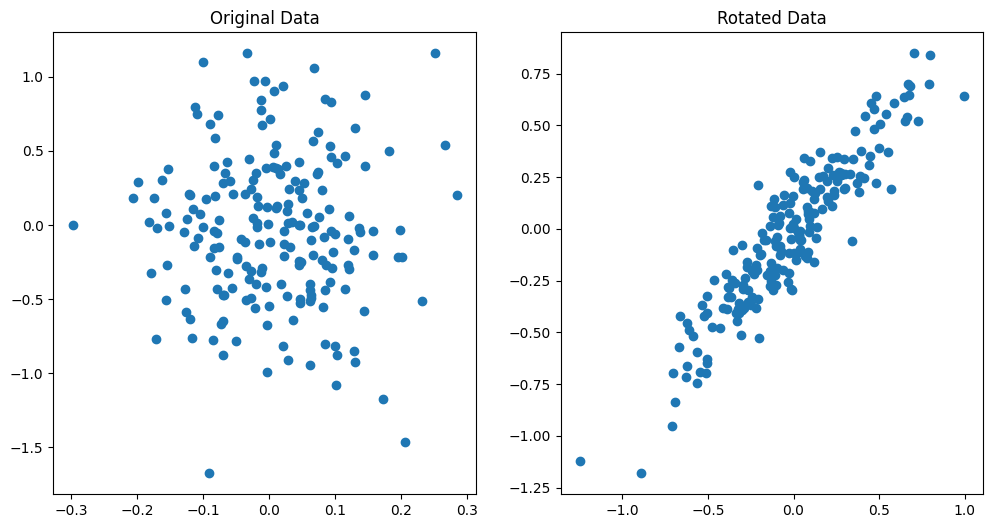

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")

plt.subplot(1, 2, 2)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1])
plt.title("Rotated Data")

plt.show()

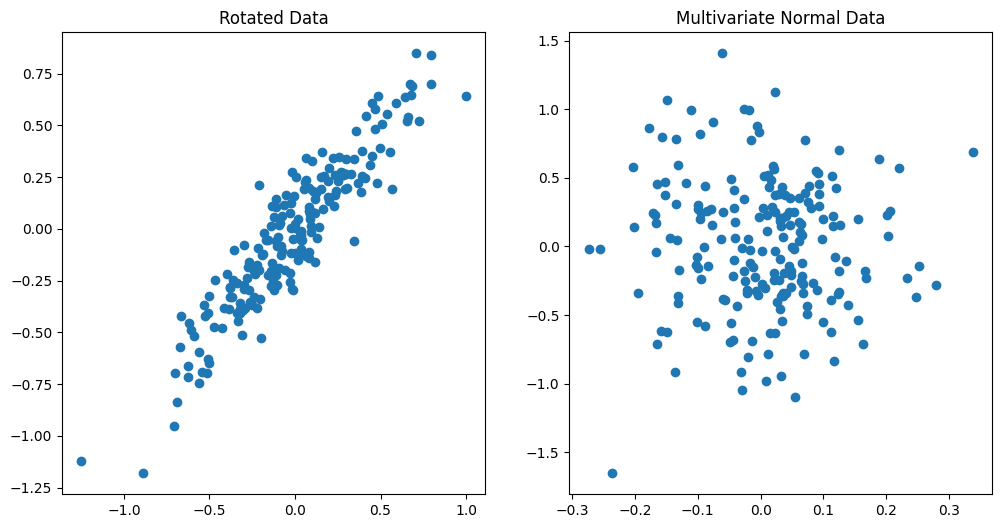

In [10]:
mean = np.array([0, 0])
cov_mv = np.array([[sigma1**2, 0], [0, sigma2**2]])
X_mv = np.random.multivariate_normal(mean, cov_mv, M)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1])
plt.title("Rotated Data")

plt.subplot(1, 2, 2)
plt.scatter(X_mv[:, 0], X_mv[:, 1])
plt.title("Multivariate Normal Data")

plt.show()

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

<a list of 5 text.Text objects>

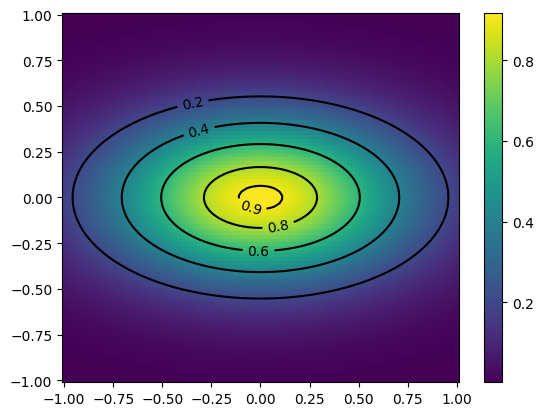

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

In [18]:
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

In [19]:
mu = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)

In [20]:
from scipy.stats import multivariate_normal

mvn = multivariate_normal(mean=mu, cov=cov)

In [21]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
ZZ = mvn.pdf(pp).reshape(XX.shape)

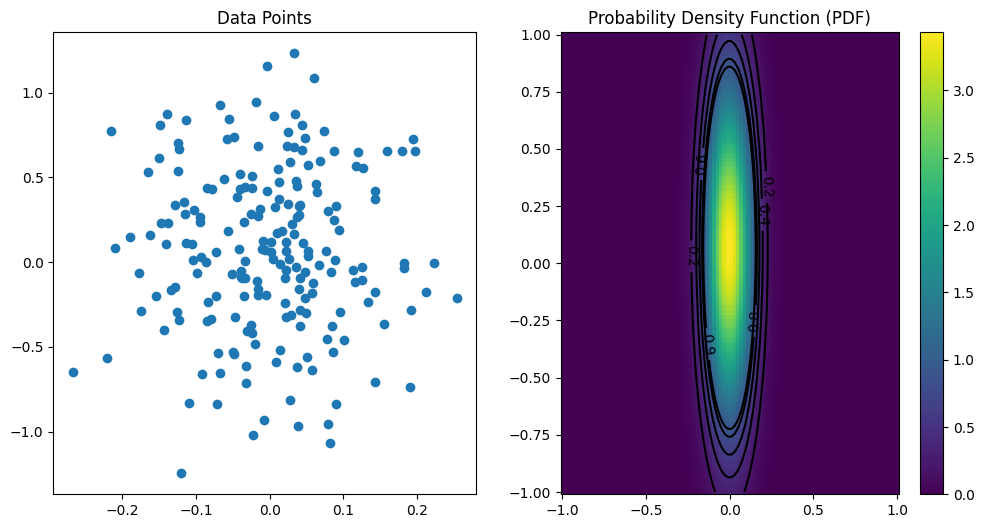

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data Points")

plt.subplot(1, 2, 2)
IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)
CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Probability Density Function (PDF)")

plt.show()

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

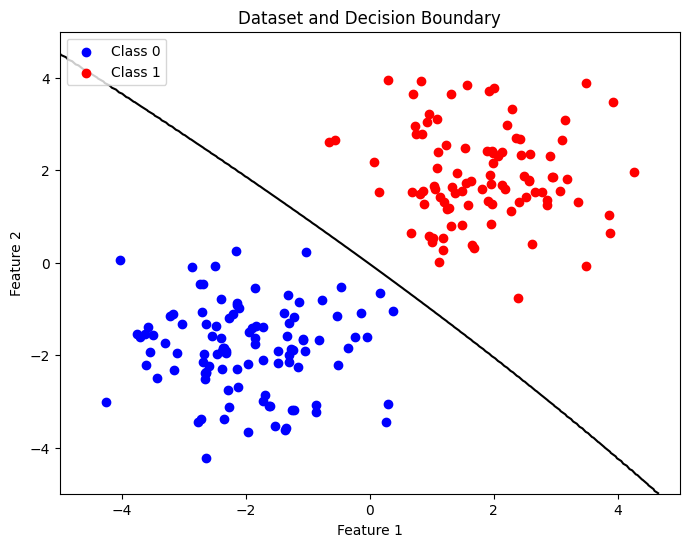

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


np.random.seed(0)
n_samples = 200
n_features = 2
n_classes = 2

X = np.random.randn(n_samples, n_features)
y = np.random.binomial(1, 0.5, n_samples)

X[y == 0] += np.array([-2, -2])
X[y == 1] += np.array([2, 2])


mu0 = np.mean(X[y == 0], axis=0)
mu1 = np.mean(X[y == 1], axis=0)

C0 = np.cov(X[y == 0].T)
C1 = np.cov(X[y == 1].T)


mvn0 = multivariate_normal(mean=mu0, cov=C0)
mvn1 = multivariate_normal(mean=mu1, cov=C1)

p_y0 = np.sum(y == 0) / n_samples
p_y1 = np.sum(y == 1) / n_samples

xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
grid_points = np.column_stack((xx.ravel(), yy.ravel()))


p_x_given_y0_grid = mvn0.pdf(grid_points)
p_x_given_y1_grid = mvn1.pdf(grid_points)

p_y_given_x0_grid = p_x_given_y0_grid * p_y0
p_y_given_x1_grid = p_x_given_y1_grid * p_y1

decision_boundary_grid = p_y_given_x0_grid - p_y_given_x1_grid

decision_boundary_mesh = decision_boundary_grid.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', label='Class 1')

plt.contour(xx, yy, decision_boundary_mesh, levels=[0], colors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset and Decision Boundary')
plt.legend()
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


In [38]:
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass

In [44]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array
from scipy.linalg import inv

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y == c].mean(axis=0) for c in self.classes_])
        self.cov_ = np.cov(X.T)
        self.inv_cov_ = inv(self.cov_)
        self.priors_ = np.array([np.sum(y == c) / len(y) for c in self.classes_])
    
    def predict(self, X):
        X = check_array(X)
        scores = np.array([np.dot(X, self.inv_cov_.dot(self.means_[c])) - 0.5 * np.dot(self.means_[c], self.inv_cov_.dot(self.means_[c])) + np.log(self.priors_[c]) for c in self.classes_])
        return self.classes_[np.argmax(scores, axis=0)]

Text(0, 0.5, 'Feature 2')

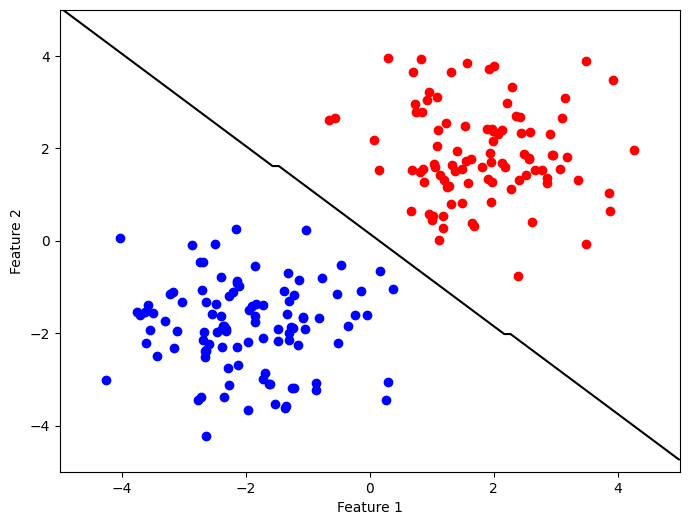

In [45]:
import matplotlib.pyplot as plt

# Generate random dataset
np.random.seed(0)
n_samples = 200
n_features = 2
n_classes = 2

X = np.random.randn(n_samples, n_features)
y = np.random.binomial(1, 0.5, n_samples)

X[y == 0] += np.array([-2, -2])
X[y == 1] += np.array([2, 2])

# Create an instance of the LDA classifier
lda = myLDA()

# Fit the classifier to the data
lda.fit(X, y)

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
grid_points = np.column_stack((xx.ravel(), yy.ravel()))

# Predict the class labels for the grid points
grid_labels = lda.predict(grid_points)

# Reshape the grid labels to match the grid shape
grid_labels_mesh = grid_labels.reshape(xx.shape)

# Visualize the dataset and decision boundary
plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', label='Class 1')

plt.contour(xx, yy, grid_labels_mesh, levels=[0.5], colors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [46]:
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass

In [47]:
from sklearn.base import BaseEstimator
import numpy as np

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y == c].mean(axis=0) for c in self.classes_])
        self.vars_ = np.array([X[y == c].var(axis=0) for c in self.classes_])
        self.priors_ = np.array([np.sum(y == c) / len(y) for c in self.classes_])
    
    def predict(self, X):
        probs = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            probs[:, i] = np.log(self.priors_[i]) + np.sum(np.log(self._pdf(X, self.means_[i], self.vars_[i])), axis=1)
        return self.classes_[np.argmax(probs, axis=1)]
    
    def _pdf(self, X, mean, var):
        return np.exp(-((X - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [51]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, n_repeated=0, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y == c].mean(axis=0) for c in self.classes_])
        self.cov_ = np.cov(X.T)
        self.inv_cov_ = inv(self.cov_)
        self.priors_ = np.array([np.sum(y == c) / len(y) for c in self.classes_])
    
    def predict(self, X):
        X = check_array(X)
        scores = np.array([np.dot(X, self.inv_cov_.dot(self.means_[c])) - 0.5 * np.dot(self.means_[c], self.inv_cov_.dot(self.means_[c])) + np.log(self.priors_[c]) for c in self.classes_])
        return self.classes_[np.argmax(scores, axis=0)]
# Train and evaluate LDA
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Precision:", precision_score(y_test, y_pred_lda))
print("Recall:", recall_score(y_test, y_pred_lda))

# Train and evaluate NB
class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y == c].mean(axis=0) for c in self.classes_])
        self.vars_ = np.array([X[y == c].var(axis=0) for c in self.classes_])
        self.priors_ = np.array([np.sum(y == c) / len(y) for c in self.classes_])
    
    def predict(self, X):
        probs = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            probs[:, i] = np.log(self.priors_[i]) + np.sum(np.log(self._pdf(X, self.means_[i], self.vars_[i])), axis=1)
        return self.classes_[np.argmax(probs, axis=1)]
    
    def _pdf(self, X, mean, var):
        return np.exp(-((X - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)
nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("NB metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))

LDA metrics:
Accuracy: 0.815
Precision: 0.7684210526315789
Recall: 0.8295454545454546
NB metrics:
Accuracy: 0.89
Precision: 0.9230769230769231
Recall: 0.8181818181818182


NB показал более высокую точность и полноту, чем LDA. Это может быть связано с тем, что данные, которые мы сгенерировали, имеют независимые признаки, что делает NB более эффективным алгоритмом.
но в общем случае LDA более сложный метод и дает более высокую точность и более нацелен на нелинейные случаи, но нб проще и более легко интерпретируемый
